This computation was originally done in Google Colab, and therefore our R was interpereted through python to allow us to mount a drive for storage of data and packages.

# Replicating Liao et al.

https://www.nature.com/articles/s41597-019-0351-8

All analysis code for *Single-cell RNA sequencing of human kidney* is available on [GitHub](https://github.com/lessonskit/Single-cell-RNA-sequencing-of-human-kidney). Our replication here is almost exactly the same as the original analysis.

In [ ]:
%reload_ext rpy2.ipython
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%%R
#Create this directory if it does not yet exist
lib_loc <- "/content/drive/MyDrive/r-lib"

In [ ]:
%%R
library(dplyr, lib = lib_loc)
library(patchwork, lib = lib_loc)
library(magrittr, lib = lib_loc)
library(Seurat, lib = lib_loc)
library(harmony, lib = lib_loc)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Seurat v4 will be going to CRAN in the near future;
 for more details, please visit https://satijalab.org/seurat/v4_changes


R[write to console]: Loading required package: Rcpp



The data can be downloaded from [here](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE131685) as MTX and TSV files and are assigned their number 1-3 as seen on the database.

In [ ]:
%%R
pathkidney1 <- '/content/drive/Shareddrives/Research - Stephen/Organized Files/Datasets/Liao/Raw Data/GSE131685_RAW/Kidney 1'
pathkidney2 <- '/content/drive/Shareddrives/Research - Stephen/Organized Files/Datasets/Liao/Raw Data/GSE131685_RAW/Kidney 2'
pathkidney3 <- '/content/drive/Shareddrives/Research - Stephen/Organized Files/Datasets/Liao/Raw Data/GSE131685_RAW/Kidney 3'

All of the following code is followed exactly from the previously mentioned Github, starting with creating the Seurat Objects.

In [ ]:
%%R
pat1.data <- Read10X(data.dir = pathkidney1)
pat2.data <- Read10X(data.dir = pathkidney2)
pat3.data <- Read10X(data.dir = pathkidney3)
pat1 <- CreateSeuratObject(counts = pat1.data, project = "kidney1", min.cells = 8, min.features = 200 )
pat2 <- CreateSeuratObject(counts = pat2.data, project = "kidney2", min.cells = 6, min.features = 200)
pat3 <- CreateSeuratObject(counts = pat3.data, project = "kidney3", min.cells = 10, min.features = 200)

Datasets are first merged and then face quality control

In [ ]:
%%R
patients <- merge(x = pat1, y = c(pat2, pat3))
patients[["percent.mt"]] <- PercentageFeatureSet(patients, pattern = "^MT-")
patients <- subset(patients, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 30)

This next step of normalization, finding variable features, cell cycle scoring, scaling, and reduction was adapted right from their github page.

In [ ]:
%%R
patients <- NormalizeData(patients)
patients <- FindVariableFeatures(patients,selection.method = "vst", nfeatures = 2000)
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$s.genes
patients <- CellCycleScoring(patients, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
all.genes <- rownames(patients)
patients <- ScaleData(patients, vars.to.regress = c("S.Score", "G2M.Score"), features = all.genes)
patients <- RunPCA(patients, pc.genes = kid@var.genes, npcs = 20, verbose=FALSE)

R[write to console]: Performing log-normalization

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to conso


Error in Seurat::FetchData(object, group.by.vars) : 
  None of the requested variables were found: dataset
Calls: <Anonymous> ... withVisible -> RunHarmony -> RunHarmony.Seurat -> <Anonymous>


Batch correction was performed using Harmony to remove batch effects across the three datasets, and UMAP reduction and Clustering was done with little changes to the original code.

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write t

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 23366
Number of edges: 719461

Running Louvain algorithm...


R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: 

Maximum modularity in 10 random starts: 0.8930
Number of communities: 10
Elapsed time: 10 seconds


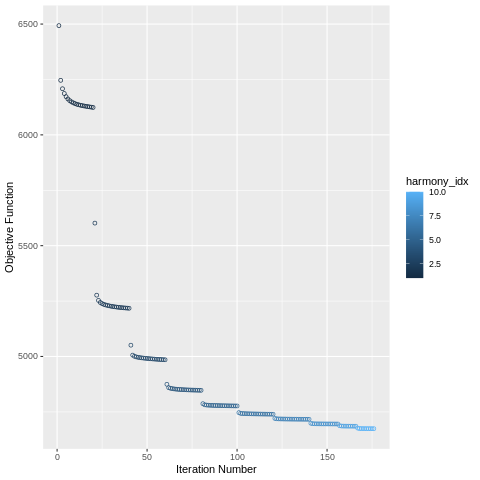

In [ ]:
%%R
patients <- patients %>% 
  RunHarmony("orig.ident", plot_convergence = TRUE)
harmony_embeddings <- Embeddings(patients, 'harmony')
harmony_embeddings[1:5, 1:5]
patients <- patients %>% 
  RunUMAP(reduction = "harmony", dims = 1:20) %>% 
  FindNeighbors(reduction = "harmony", dims = 1:20) %>% 
  FindClusters(resolution = 0.25) %>% 
  identity()
new.cluster.ids <- c("Proximal convoluted tubule", "Proximal tubule", "Proximal straight tubule", "NK-T", "Monocytes", "Glomerular parietal eptihelial", "Distal tubule", "Principal", "B", "Intercalated")
names(new.cluster.ids) <- levels(patients)
patients <- RenameIdents(patients, new.cluster.ids)

And here is the UMAP visualization with the proper cell type labeling based off of their analysis.

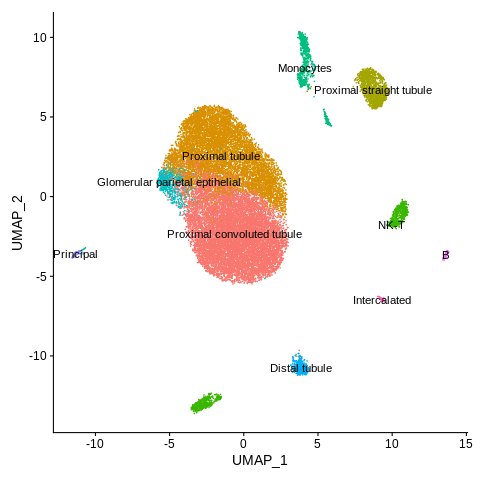

In [ ]:
%%R
DimPlot(sobj, label = TRUE) + NoLegend()

In [ ]:
%%R
sobj <- patients
save(sobj, file = '/content/drive/Shareddrives/Research - Stephen/Organized Files/Datasets/Liao/Seurat Object/liaocolab')

In [ ]:
%%R
load('/content/drive/Shareddrives/Research - Stephen/Organized Files/Datasets/Liao/Seurat Object/liaocolab')